Индивидуальный проект: **Предсказание качества вина**

Автор: **Савин Вадим**

Проверяющий: **Бысов Федор**

Ссылка на датасет: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Примерный план (подстроить план под вашу задачу)
1. Цель и задачи исследования
2. Описание набора данных
3. Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация
4. Генерация и селекция признаков + нормализация
5. Исключение аномалий, заполнение пропусков в данных и.т.д.
6. Очистка данных от шума
7. Выбор метода/алгоритма, модели, архитектуры (для НС)
8. Настройка гиперпараметров (для НС), выбор параметров метода/алгоритма
9. Выбор метрики оценки качества (RMSE, R^2)
10. Генерация наборов для обучения, тестирования и валидации
11. Развертывание и работа модели, визуализация результатов
12. Выводы

## 1. Цель и задачи исследования


**Предсказать качество вина по его химическому составу**

- Многие люди пьют вино, оценивают его и по этому исследованию можно определить, что именно влияет на его оценку и восприятие, а также можно будет определить по составу, понравится ли то или иное вино большинству людей

## 2. Описание набора данных

Данные взяты из: 

[Добавить ссылка на данные, если они открыты](_____)


### Описание данных

Датасет представлен в виде файла csv

- Выборка включает 1599 записей и 12 признаков (строки и столбцы соответственно).

- Количественные переменные:
    
    фиксированная кислотность - большинство кислот, связанных с вином, фиксированные или нелетучие (не испаряются быстро)
    
    летучая кислотность - количество уксусной кислоты в вине, которое при слишком высоком уровне может привести к неприятному уксусному вкусу.
    
    лимонная кислота - в небольших количествах лимонная кислота может придать винам «свежесть» и аромат.
    
    остаточный сахар - количество сахара, оставшееся после остановки брожения, редко можно найти вина с содержанием сахара менее 1 г/л.
    
    хлориды - количество соли в вине
    
    свободный диоксид серы - свободная форма SO2 существует в равновесии между молекулярным SO2 (в виде растворенного газа) и ионом бисульфита
    
    диоксид серы общий - количество свободной и связанной форм SO2
    
    плотность - плотность воды близка к плотности воды в зависимости от процентного содержания спирта и сахара
    
    pH- описывает, насколько вино кислое или щелочное по шкале от 0 (очень кислое) до 14 (очень щелочное).
    
    сульфаты - добавка к вину, которая может повышать уровень сернистого газа (S02)
    
    алкоголь - процент содержания алкоголя в вине
    
    качество - выходная переменная (на основе сенсорных данных, оценка от 0 до 10)

##  3. Разведочный анализ данных (англ. exploratory data analysis, EDA) + визуализация

[Что такое EDA?](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

- выгрузка данных
- визуализация
- взаимодействие между параметрами (корреляция и прочее)
- проверка на нормальность
- закономерности, "инсайты", особенности данных

In [2]:
all_data = pd.read_csv('winequality-red.csv')
all_data.head()
all_data[all_data["quality"] > 7]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Мы не видим никаких значений NaN, у нас типы данных float64 и int64.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

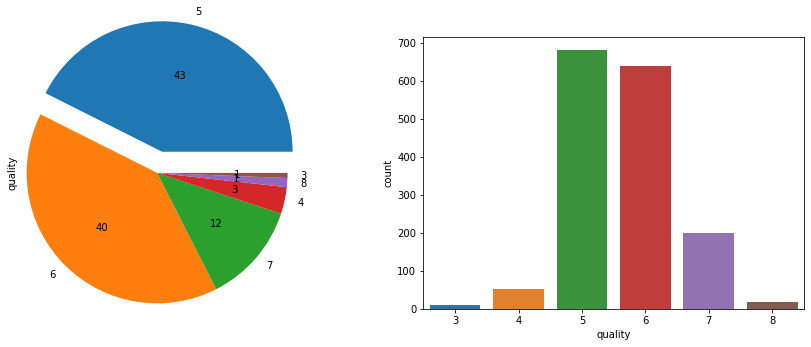

In [4]:
plt.figure(figsize = (15,5))
plt.subplot(121)
my_explode = [0.2,0,0,0,0,0]
all_data['quality'].value_counts().plot(kind ='pie',autopct = '%2.f',explode = my_explode,radius = 1.2)
plt.subplot(122)
sns.countplot(data = all_data, x = 'quality')
all_data['quality'].value_counts()

Наш набор данных в основном имеет качество вина 5 и 6.

/Users/a123/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/a123/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/a123/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

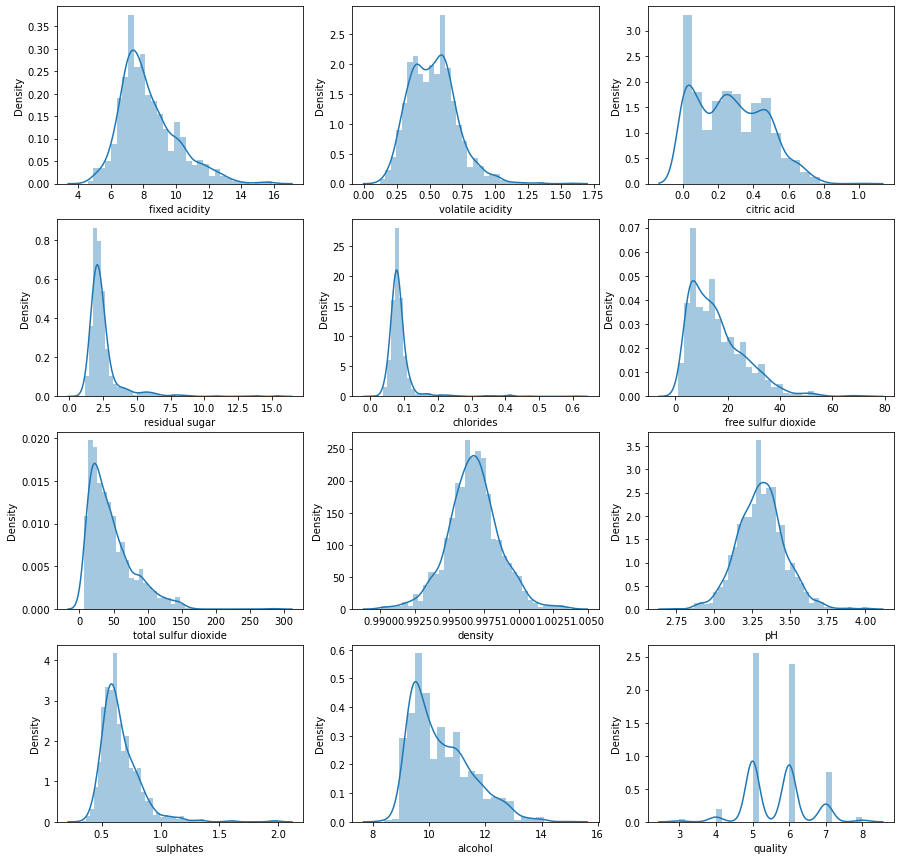

In [5]:
j=1 
fig = plt.figure(figsize = (15,15))
for i in all_data.columns:
    plt.subplot(4,3,j)
    sns.distplot(all_data[i])
    j=j+1

Почти все функции представлены в искаженном формате

Поскольку данные искажены, они должны иметь выбросы. Построим боксплоты

/Users/a123/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/a123/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/a123/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

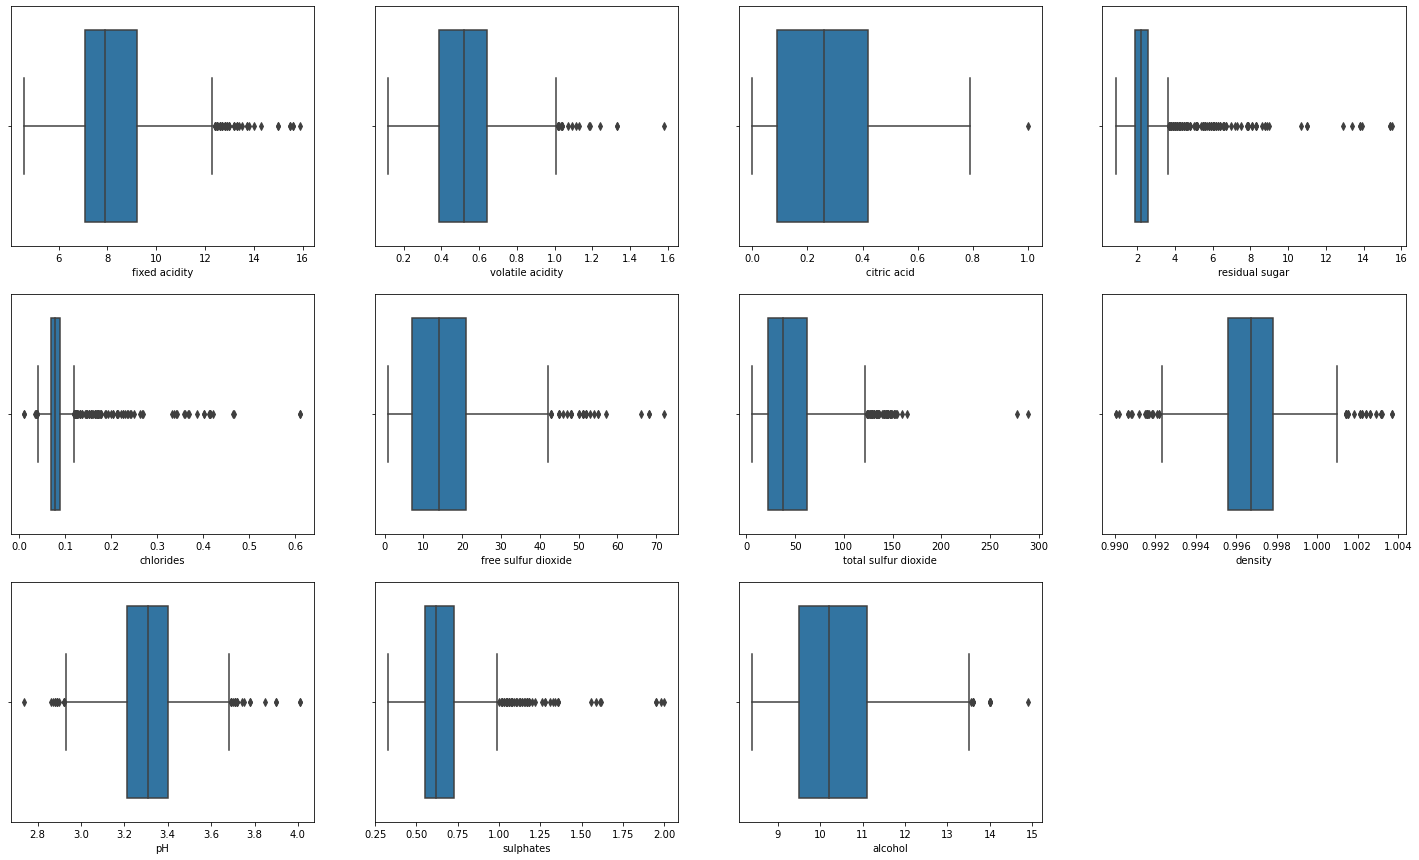

In [6]:
j=1 
fig = plt.figure(figsize = (25,15))
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    plt.subplot(3,4,j)
    sns.boxplot(all_data[i])
    j=j+1

Во всех входных функциях присутствуют выбросы. Поскольку все признаки являются числовыми, мы построим матрицу корреляции, чтобы увидеть корреляцию между каждыми двумя признаками.

<AxesSubplot:>

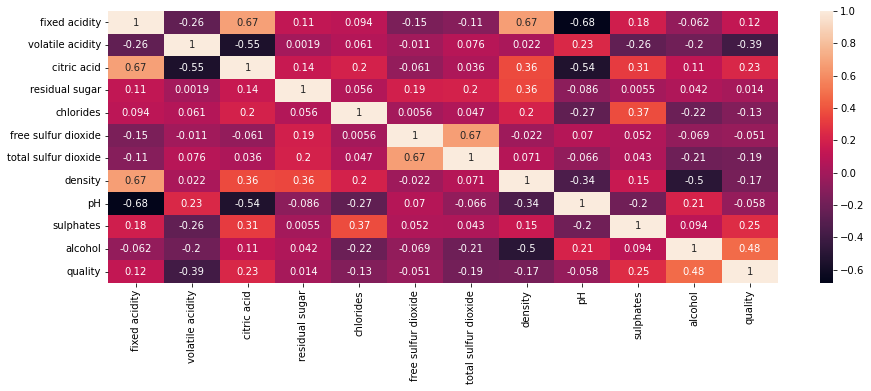

In [7]:
plt.figure(figsize = (15,5))
corr = all_data.corr()
sns.heatmap(corr,annot = True)

фиксированная кислотность имеет высокую корреляцию (>0,6) с плотностью и лимонной кислотой и отрицательную корреляцию (<-0,69) с рН.

летучие кислоты, по-видимому, отрицательно влияют на качество (-0,41).

алкоголь оказывает влияние на качество вина.

алкоголь и плотность имеют отрицательную корреляцию (-0,49)

pH, свободный и общий диоксид серы, хлориды, остаточный сахар не имеют высокой корреляции с качеством.

## 4. Генерация и селекция признаков + нормализация

Сделаем последний столбец "качество" категориальным признаком. Он будет принимать только два значения: "хорошее вино" и "плохе вино"

In [8]:
my_bins = (2, 6.5, 8)
groups = ['bad', 'good']
all_data['quality'] = pd.cut(all_data['quality'], bins = my_bins, labels = groups)


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_data['quality']= le.fit_transform(all_data['quality'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = all_data.iloc[:,0:11]
y = all_data['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =12)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

for name, score in zip(X.columns, rf_clf.feature_importances_):
    print(name, score *100)

fixed acidity 7.302102227970608
volatile acidity 11.181045226247441
citric acid 9.573830784016499
residual sugar 5.958379846242641
chlorides 6.5021401542375274
free sulfur dioxide 5.929774270112232
total sulfur dioxide 8.17233705408663
density 8.697932208553844
pH 5.738691912306591
sulphates 12.231619510286706
alcohol 18.712146805939287


<AxesSubplot:xlabel='Features', ylabel='%Importance'>

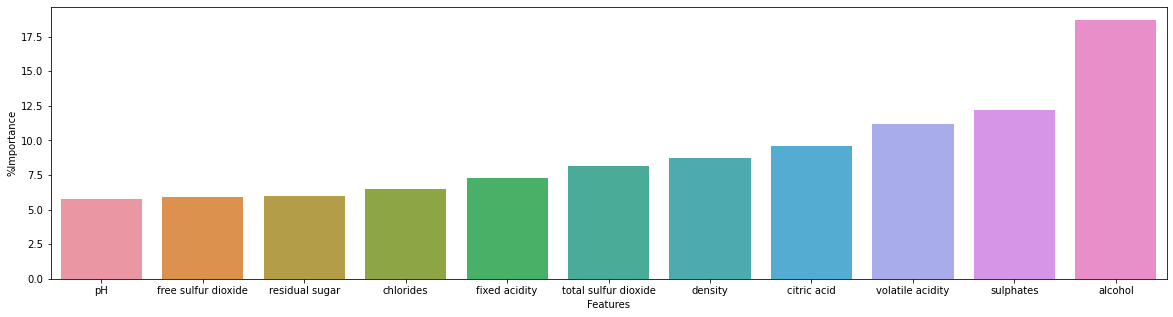

In [11]:
data = {'Features': X.columns , '%Importance': rf_clf.feature_importances_ * 100 }
temp = pd.DataFrame(data)

plt.figure(figsize =(20,5))
sns.barplot(data =temp.sort_values(by =['%Importance']) ,x='Features', y ='%Importance')

Алкоголь - самая важная характеристика

Летучая кислотность – вторая по важности характеристика.

Далее следуют сульфаты и плотность

Отбрасывание признаков, которые не имеют большого значения

In [12]:
all_data_clean = all_data
all_data_clean.drop(columns = ['pH','free sulfur dioxide','residual sugar', 'chlorides'] , inplace = True)


Проведем нормирование признаков для более точного построения модели

In [13]:

from sklearn import preprocessing

d = preprocessing.normalize(all_data, axis=0)

names = all_data_clean.columns
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.021772,0.031409,0.000000,0.014936,0.025034,0.020606,0.022436,0.0
1,0.022949,0.039485,0.000000,0.029433,0.025009,0.025022,0.023391,0.0
2,0.022949,0.034101,0.002998,0.023722,0.025014,0.023918,0.023391,0.0
3,0.032952,0.012563,0.041968,0.026358,0.025039,0.021342,0.023391,0.0
4,0.021772,0.031409,0.000000,0.014936,0.025034,0.020606,0.022436,0.0


[Feature selection & Feature generation](https://www.bigdataschool.ru/blog/data-preparation-operations.html)

Для задач с временными рядами: https://github.com/blue-yonder/tsfresh

## 5. Исключение аномалий, заполнение пропусков в данных и.т.д.

Используем критерии 3 сигма, гистограммы, ящики с усами и.т.д.:
 [Anomaly Detection](https://alexanderdyakonov.wordpress.com/2017/04/19/%D0%BF%D0%BE%D0%B8%D1%81%D0%BA-%D0%B0%D0%BD%D0%BE%D0%BC%D0%B0%D0%BB%D0%B8%D0%B9-anomaly-detection/)
 [Подготовка датасета](https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27)







Используем z-значения для того, чтобы убрать выбросы

Z-оценка показывает, сколько стандартных отклонений данного значения от среднего. Мы используем следующую формулу для расчета z-показателя:

z = (X - μ) / σ

куда:

X — это одно необработанное значение данных.
μ - среднее значение населения
σ - стандартное отклонение населения
Вы можете определить наблюдение как выброс, если его z-оценка меньше -3 или больше 3.

Выбросы = наблюдения с z-показателями> 3 или <-3

In [14]:
import scipy.stats as stats
z = np.abs(stats.zscore(scaled_df))
 
data_clean = scaled_df[(z<3).all(axis=1)]

data_clean.shape



(1517, 8)

/Users/a123/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/a123/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/a123/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

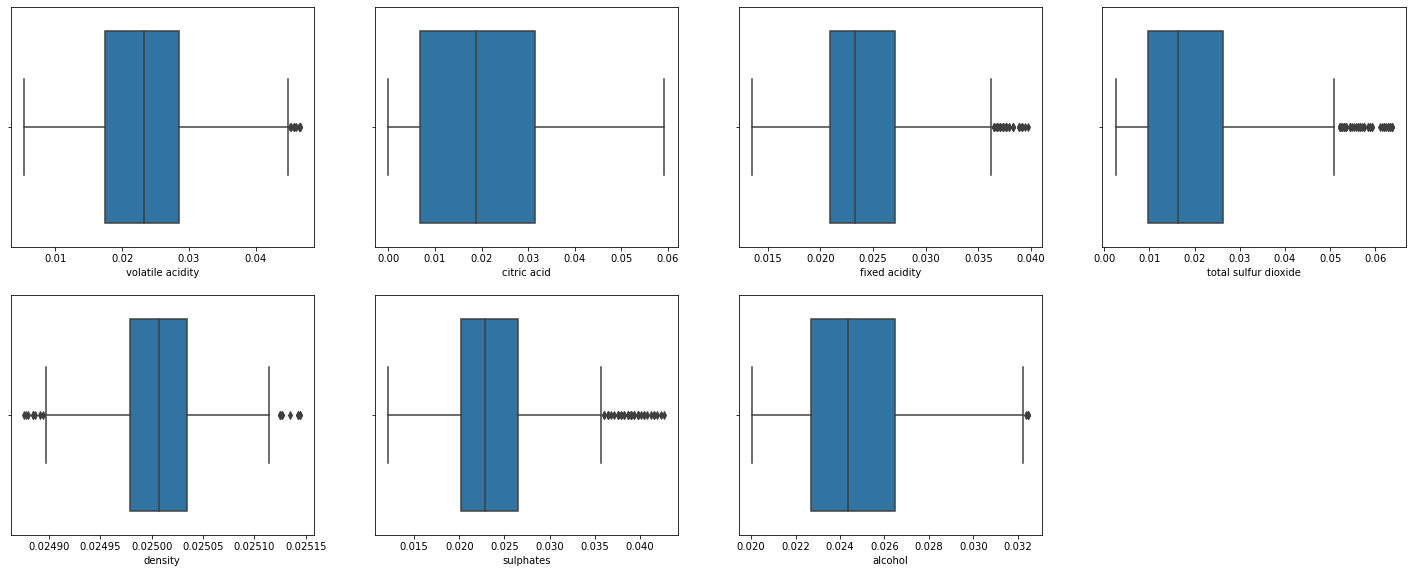

In [15]:
j=1 
fig = plt.figure(figsize = (25,15))
for i in ['volatile acidity', 'citric acid', 'fixed acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']:
    plt.subplot(3,4,j)
    sns.boxplot(data_clean[i])
    j=j+1

## 7. Выбор метода/алгоритма, модели, архитектуры (для НС)

- Выбрать 2 типа модели:
  

In [16]:
X = data_clean.drop(columns = 'quality')
y= data_clean['quality']
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y_transformed,test_size = 0.2, random_state =12)



Я буду использовать две модели: k-nearest neighbour и random forest.

In [17]:
from sklearn.neighbors import KNeighborsClassifier


rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
voting_clf = VotingClassifier(
 estimators=[('rf', rf_clf), ('knn',knn_clf)],
 voting='hard',n_jobs = -1)


voting_clf.fit(X_train, y_train)
for clf in (rf_clf,knn_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred) * 100)

RandomForestClassifier 94.07894736842105
KNeighborsClassifier 88.1578947368421
VotingClassifier 92.10526315789474


## 8. Настройка гиперпараметров (для НС), выбор параметров метода/алгоритма

- Самый естественный способ организовать подбор гиперпараметров — сделать перебор по сетке (`Grid Search`):

  - для каждого гиперпараметра фиксируется несколько значений;
  - перебираются все комбинации значений различных гиперпараметров, на каждой из этих комбинаций модель обучается и тестируется;
  - выбирается комбинация, на которой модель показывает лучшее качество;
  - есть много библиотечных функций для [Grid Search](https://pythonpip.ru/osnovy/poisk-po-setke-python), например [тут](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html);

In [18]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

para_knn = {'n_neighbors':np.arange(1, 50)}
grid_knn = GridSearchCV(knn_clf, param_grid=para_knn, cv=5)

param_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf_clf, param_grid=param_rf, cv=5)

grid_knn.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

classifiers = ['grid_knn','grid_rf']


print("parameters for KNN:", grid_knn.best_params_)
print("parameters for Random Forest:", grid_rf.best_params_)

parameters for KNN: {'n_neighbors': 10}
parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}


In [23]:
knn = KNeighborsClassifier(n_neighbors= 10)
rf = RandomForestClassifier(min_samples_leaf= 2, n_estimators = 350)

for clf in (knn, rf):
     clf.fit(X_train, y_train)
     y_pred = clf.predict(X_test)
     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.8881578947368421
RandomForestClassifier 0.944078947368421


## 10. Генерация наборов для обучения, тестирования и валидации

- Разделение выборки на обучающую и тестовую (70/30 или 80/20).
    - Отложить тестовую выборку до финального теста
    - Валидационная часть может быть выделена автоматически при кросс-валидации


- Провести кросс-валидацию. Кросс-валидация может быть нужна в случаях, если данных мало или мы не хотим зависеть от конкретного выбора валидационного множества. 

   - Например, можно использовать метод `k-Fold`

  - Кросс-валидация для временных рядов посложнее, так как данные не должны пересекаться по времени: тренировочные данные должны идти до валидационных, а валидационные — до тестовых

In [24]:
from sklearn.model_selection import cross_val_score
value = []
Model = ['KNeighborsClassifier ','RandomForestClassifier ','Voting Classifier']

for i in [knn, rf,voting_clf]:
    eval = cross_val_score(estimator = i, X = X_test, y = y_test, cv = 10)
    value.append(eval.mean())
    
data = {'Models': Model , 'CrossValScore':  value  }
temp = pd.DataFrame(data)

In [25]:
temp

,Models,CrossValScore
0,KNeighborsClassifier,0.875161
1,RandomForestClassifier,0.911613
2,Voting Classifier,0.904946


## 12. Выводы

Данная работа показывает, что на оценку вина больше всего влияет содержание алкоголя и сульфатов. На основе всех данных мы построили 2 модели, которые могут предсказывать хорошее вино или нет с точностью 89% и 94%